In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Step 1: Data Exploration

In [112]:
data = pd.read_csv('performance.csv')
data.sample(5)

,Unnamed: 0,Adm_Year,Gender,Age,HSC_Pass_Year,Program,Merit_Scholarship,Uni_Transport,Learn_Mode,Smartphone,...,SM_Hours1,Avg_Attendance1,Skills1,Skill_Dev_Hours1,Interest_Area1,Prev_SGPA1,Curr_CGPA1,Completed_Credits1,Diploma,Family_Income1
498,678,2021.0,Female,21.0,2019.0,BCSE,Yes,No,Offline,Yes,...,2.0,90.0,Programming,1.0,Software,3.38,3.53,24.0,False,40000.0
173,326,2021.0,Male,22.0,2020.0,BCSE,Yes,No,Offline,Yes,...,15.0,80.0,Programming,0.0,Software,1.53,2.43,23.0,False,30000.0
550,735,2020.0,Male,22.0,2019.0,BCSE,No,No,Offline,Yes,...,2.0,95.0,"Programming, Web development",2.0,Data Science,3.20,3.51,80.0,False,100000.0
768,953,2021.0,Female,20.0,2021.0,BCSE,Yes,No,Offline,Yes,...,2.0,100.0,Networking,1.0,Hardware,2.66,3.83,102.0,False,60000.0
750,935,2020.0,Female,23.0,2019.0,BCSE,No,No,Offline,Yes,...,7.0,100.0,Programming,2.0,Software,1.99,3.00,121.0,False,55000.0


In [113]:
data.shape

(1009, 34)

In [114]:
data[['Target']].head(10)

,Target
0,Good
1,Good
2,Good
3,Average
4,Good
5,Average
6,Excellent
7,Good
8,Good
9,Good


In [115]:
unique_target_values = data['Target'].unique()
unique_target_values

array(['Good', 'Average', 'Excellent', 'Poor'], dtype=object)

## Step 2: Data Preprocessing

In [116]:
# Encode the target variable
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])  # 0: Poor, 1: Average, 2: Good, 3: Excellent
class_names = ['Poor', 'Average', 'Good', 'Excellent']
class_names = label_encoder.classes_
data[['Target']].head(10)

,Target
0,2
1,2
2,2
3,0
4,2
5,0
6,1
7,2
8,2
9,2


In [117]:
# Get the class names and count values
class_labels = label_encoder.classes_
class_counts = data['Target'].value_counts().sort_index()

# Create a DataFrame with the count values
count_values = pd.DataFrame({
    "Class": class_labels,
    "Count": class_counts.values
})

# Display the count values
count_values

,Class,Count
0,Average,272
1,Excellent,56
2,Good,178
3,Poor,503


In [118]:
# Select features for classification (exclude non-numeric / irrelevant columns)
features = data.select_dtypes(include=['float64', 'int64'])
features

,Unnamed: 0,Adm_Year,Age,HSC_Pass_Year,Curr_Sem1,Study_Hours1,Study_Sessions1,SM_Hours1,Avg_Attendance1,Skill_Dev_Hours1,Prev_SGPA1,Curr_CGPA1,Completed_Credits1,Family_Income1
0,7,2021.0,22.0,2019.0,4.0,2.0,2.0,2.0,100.0,1.0,3.80,3.64,35.0,32500.0
1,11,2021.0,22.0,2019.0,4.0,3.5,2.0,2.0,90.0,1.0,3.40,3.53,35.0,20000.0
2,15,2021.0,20.0,2020.0,4.0,2.0,1.0,1.0,95.0,3.0,3.93,3.89,35.0,30000.0
3,18,2021.0,21.0,2020.0,4.0,1.0,2.0,3.0,95.0,1.0,3.10,3.50,35.0,25000.0
4,20,2021.0,21.0,2019.0,4.0,3.0,2.0,2.0,96.0,1.0,3.81,3.65,34.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,1189,2021.0,20.0,2020.0,8.0,1.0,2.0,2.0,46.0,2.0,2.65,3.77,100.0,180000.0
1005,1190,2022.0,23.0,2020.0,8.0,4.0,4.0,4.0,100.0,2.0,2.50,2.22,18.0,200000.0
1006,1191,2021.0,22.0,2020.0,9.0,3.0,3.0,2.0,100.0,2.0,1.56,2.78,121.0,200000.0
1007,1192,2019.0,25.0,2018.0,11.0,5.0,3.0,3.0,100.0,4.0,1.40,2.52,144.0,210000.0


In [119]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(features)
y = data['Target']

In [120]:
# Split the dataset into training and testing (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 3: Model Training and First Evaluation

In [121]:
# Initialize classifiers
logistic_regression = LogisticRegression(solver='saga', random_state=0)
svm_classifier = SVC(kernel='rbf',random_state=0)
mlp_classifier = MLPClassifier(random_state=0)

In [122]:
# Train the models
logistic_regression.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp_classifier.fit(X_train, y_train);

c:\Users\kuzmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kuzmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [123]:
# Make predictions
y_pred_lr = logistic_regression.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_mlp = mlp_classifier.predict(X_test)

In [124]:
# Evaluate the models
results = {
    "Model": ["Logistic Regression", "SVM", "MLP"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_mlp),
    ]
}

# Generate classification reports
report_lr = classification_report(y_test, y_pred_lr, target_names=class_names)
report_svm = classification_report(y_test, y_pred_svm, target_names=class_names)
report_mlp = classification_report(y_test, y_pred_mlp, target_names=class_names)

# Prepare a DataFrame for model comparison results
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "MLP"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_mlp),
    ]
})

In [125]:
print("Model Comparison:\n", results_df)

Model Comparison:
                  Model  Accuracy
0  Logistic Regression  0.768977
1                  SVM  0.752475
2                  MLP  0.788779


In [126]:
print("\nLogistic Regression Classification Report:\n", report_lr)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

     Average       0.59      0.60      0.60        73
   Excellent       0.71      0.42      0.53        12
        Good       0.66      0.65      0.65        65
        Poor       0.90      0.93      0.91       153

    accuracy                           0.77       303
   macro avg       0.72      0.65      0.67       303
weighted avg       0.77      0.77      0.77       303



In [127]:
print("\nSVM Classification Report:\n", report_svm)


SVM Classification Report:
               precision    recall  f1-score   support

     Average       0.58      0.63      0.61        73
   Excellent       0.40      0.33      0.36        12
        Good       0.65      0.60      0.62        65
        Poor       0.90      0.91      0.91       153

    accuracy                           0.75       303
   macro avg       0.63      0.62      0.62       303
weighted avg       0.75      0.75      0.75       303



In [128]:
print("\nMLP Classification Report:\n", report_mlp)


MLP Classification Report:
               precision    recall  f1-score   support

     Average       0.64      0.63      0.63        73
   Excellent       0.43      0.50      0.46        12
        Good       0.69      0.66      0.68        65
        Poor       0.93      0.94      0.94       153

    accuracy                           0.79       303
   macro avg       0.67      0.68      0.68       303
weighted avg       0.79      0.79      0.79       303



[[ 44   2  12  15]
 [  0   5   7   0]
 [ 22   0  42   1]
 [  8   0   3 142]]
[[ 46   0  12  15]
 [  1   4   7   0]
 [ 20   6  39   0]
 [ 12   0   2 139]]
[[ 46   3  13  11]
 [  0   6   6   0]
 [ 17   5  43   0]
 [  9   0   0 144]]


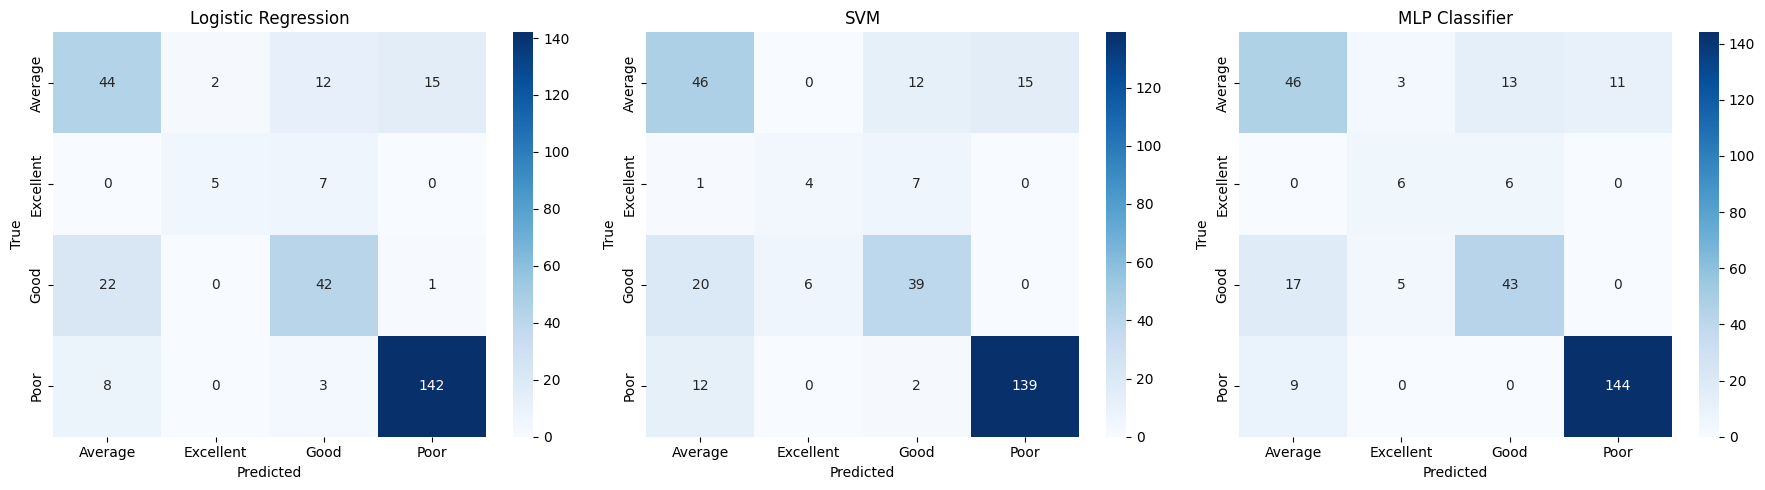

In [129]:
# Confusion matrices for each model 
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", ax=axes[0], cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

print(confusion_matrix(y_test, y_pred_lr))

# SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", ax=axes[1], cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
axes[1].set_title("SVM")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

print(confusion_matrix(y_test, y_pred_svm))

# MLP
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt="d", ax=axes[2], cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
axes[2].set_title("MLP Classifier")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("True")

print(confusion_matrix(y_test, y_pred_mlp))

plt.tight_layout()


## Step 4: Hyperparameter Tuning

In [130]:
# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 20, 50, 100]}
param_grid_mlp = {
    'hidden_layer_sizes': [(128,), (64, 64), (128, 64), (128, 64, 32)]}

# Initialize classifiers
logistic_regression = LogisticRegression(solver='saga', random_state=0)
svm_classifier = SVC(random_state=0)
mlp_classifier = MLPClassifier(random_state=0)

# Perform Grid Search for Logistic Regression
grid_search_lr = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Perform Grid Search for SVM
grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Perform Grid Search for MLP
grid_search_mlp = GridSearchCV(mlp_classifier, param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)

# Print the best parameters and best scores
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Cross-Validation Score for Logistic Regression:", grid_search_lr.best_score_)

print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Cross-Validation Score for SVM:", grid_search_svm.best_score_)

print("Best Parameters for MLP:", grid_search_mlp.best_params_)
print("Best Cross-Validation Score for MLP:", grid_search_mlp.best_score_)


c:\Users\kuzmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 1}
Best Cross-Validation Score for Logistic Regression: 0.753601038857257
Best Parameters for SVM: {'C': 10}
Best Cross-Validation Score for SVM: 0.8272100689241834
Best Parameters for MLP: {'hidden_layer_sizes': (128, 64, 32)}
Best Cross-Validation Score for MLP: 0.8385376086305063


## Step 5: Model Retraining and Second Evaluation

In [131]:
logistic_regression = LogisticRegression(solver='saga', C=1, random_state=0)
svm_classifier = SVC(kernel='rbf', C=10, random_state=0)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(128, 64, 32), random_state=0)

logistic_regression.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
mlp_classifier.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_mlp = mlp_classifier.predict(X_test)

c:\Users\kuzmi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [132]:
# Evaluate the models again
results = {
    "Model": ["Logistic Regression", "SVM", "MLP"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_mlp),
    ]
}

# Generate classification reports
report_lr = classification_report(y_test, y_pred_lr, target_names=class_names)
report_svm = classification_report(y_test, y_pred_svm, target_names=class_names)
report_mlp = classification_report(y_test, y_pred_mlp, target_names=class_names)

# Prepare a DataFrame for model comparison results
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "MLP"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_mlp),
    ]
})

In [133]:
# Print the model comparison table
print("Model Comparison:\n", results_df)

Model Comparison:
                  Model  Accuracy
0  Logistic Regression  0.768977
1                  SVM  0.798680
2                  MLP  0.828383


In [134]:
print("\nLogistic Regression Classification Report:\n", report_lr)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

     Average       0.59      0.60      0.60        73
   Excellent       0.71      0.42      0.53        12
        Good       0.66      0.65      0.65        65
        Poor       0.90      0.93      0.91       153

    accuracy                           0.77       303
   macro avg       0.72      0.65      0.67       303
weighted avg       0.77      0.77      0.77       303



In [135]:
print("\nSVM Classification Report:\n", report_svm)


SVM Classification Report:
               precision    recall  f1-score   support

     Average       0.64      0.71      0.68        73
   Excellent       0.50      0.58      0.54        12
        Good       0.74      0.66      0.70        65
        Poor       0.93      0.92      0.92       153

    accuracy                           0.80       303
   macro avg       0.70      0.72      0.71       303
weighted avg       0.80      0.80      0.80       303



In [136]:
print("\nMLP Classification Report:\n", report_mlp)


MLP Classification Report:
               precision    recall  f1-score   support

     Average       0.68      0.68      0.68        73
   Excellent       0.71      0.83      0.77        12
        Good       0.79      0.74      0.76        65
        Poor       0.92      0.93      0.93       153

    accuracy                           0.83       303
   macro avg       0.78      0.80      0.79       303
weighted avg       0.83      0.83      0.83       303



[[ 44   2  12  15]
 [  0   5   7   0]
 [ 22   0  42   1]
 [  8   0   3 142]]
[[ 52   0  11  10]
 [  1   7   4   0]
 [ 15   7  43   0]
 [ 13   0   0 140]]
[[ 50   0  11  12]
 [  0  10   2   0]
 [ 13   4  48   0]
 [ 10   0   0 143]]


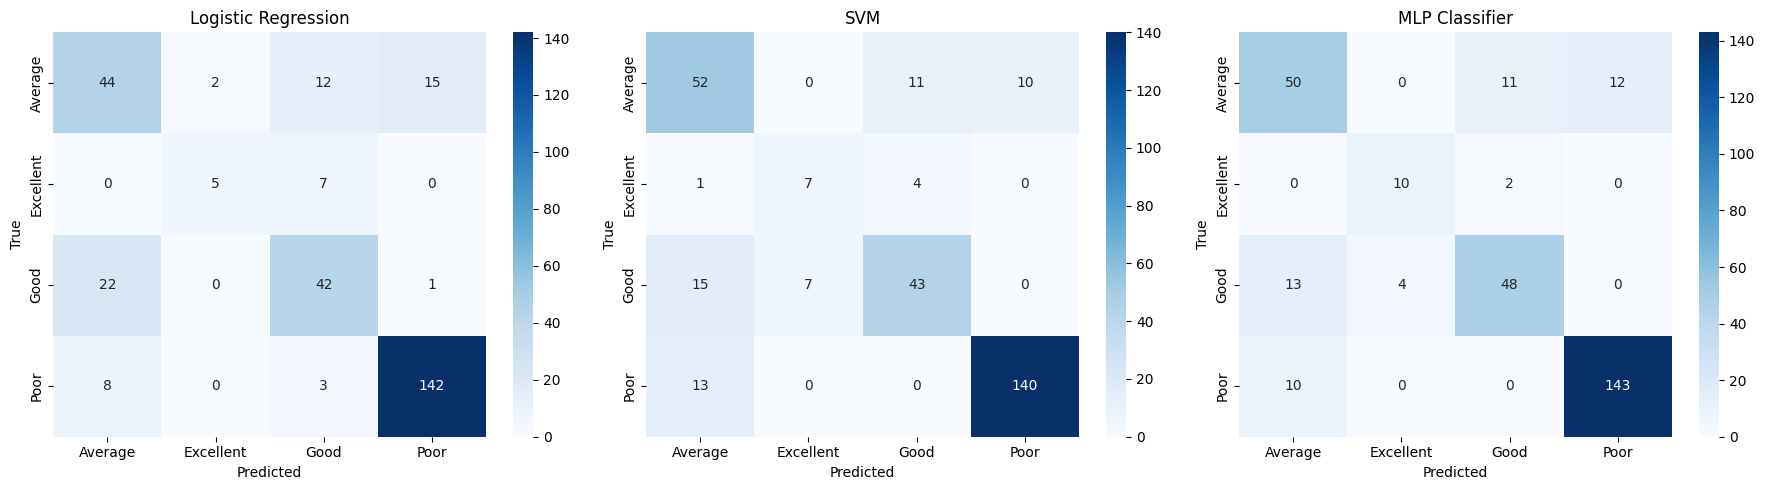

In [137]:
# Confusion matrices for each model 
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", ax=axes[0], cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

print(confusion_matrix(y_test, y_pred_lr))

# SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", ax=axes[1], cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
axes[1].set_title("SVM")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

print(confusion_matrix(y_test, y_pred_svm))

# MLP
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt="d", ax=axes[2], cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
axes[2].set_title("MLP Classifier")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("True")

print(confusion_matrix(y_test, y_pred_mlp))

plt.tight_layout()

## Step 6: Analysis and Discussion

### Model Performance Comparison: Before and After Tuning

#### Accuracy
- **Before Tuning**:
  - Logistic Regression: **77%**
  - SVM: **75%**
  - MLP: **79%**
- **After Tuning**:
  - Logistic Regression: **77%** (no change)
  - SVM: **80%** (+5%)
  - MLP: **83%** (+4%)

#### Confusion Matrix Analysis
- **Logistic Regression**: No improvement after tuning.
- **SVM**: Reduced misclassifications in "Average" and "Good."
- **MLP**: Significant improvement in "Excellent" and "Good" classifications.

#### Summary
- **Best Overall Model (After Tuning)**: **MLP** (highest accuracy: 83%, balanced performance).
- **Most Improved Model**: **SVM** (+5% accuracy, better class-level metrics).
- **Least Improved Model**: **Logistic Regression** (no changes).



### Most Misclassified Target Class
- **"Average"** class had the most misclassifications across all models, often confused with "Poor" or "Good."

#### Potential causes:
1. **Class Overlap**: Features of "Average" overlap with "Good" and "Poor."
2. **Class Imbalance**: Fewer "Excellent" and dominant "Poor" affect decision boundaries.
3. **Feature Representation**: Features may fail to capture class distinctions.
4. **Model Bias**: Regularization or decision boundaries skewed toward dominant classes.